**Deep Learning**

In this section, deep learning is implemented using the popular **fastai** library built on top of PyTorch, which is designed to make deep learning accessible and easy to use.
For more information, check [Fastai Documentation](https://docs.fast.ai/)

Code below imports the fastai library and prints the installed version. Knowing the version helps ensure compatibility and access to the latest features.

In [1]:
import fastai
print(fastai.__version__)

2.7.15


Then we import the necessary modules from the fastai library for handling tabular data, as well as the pandas library for data manipulation and Path for file path handling.

In [2]:
from fastai.tabular.all import *
import pandas as pd
from pathlib import Path

This code reads the training and testing datasets from CSV files into Pandas DataFrames for further processing.

In [3]:
# Load the datasets
train_df = pd.read_csv('/content/nph_vs_nc_train.csv')
test_df = pd.read_csv('/content/nph_vs_nc_test.csv')

In [4]:
# Split the train_df into male and female datasets
train_male_df = train_df[train_df['Sex'] == 1]
train_female_df = train_df[train_df['Sex'] == 0]

# Split the test_df into male and female datasets
test_male_df = test_df[test_df['Sex'] == 1]
test_female_df = test_df[test_df['Sex'] == 0]

# Display the number of records in each dataset to confirm
print("Number of records in train_male_df:", len(train_male_df))
print("Number of records in train_female_df:", len(train_female_df))
print("Number of records in test_male_df:", len(test_male_df))
print("Number of records in test_female_df:", len(test_female_df))

Number of records in train_male_df: 157
Number of records in train_female_df: 140
Number of records in test_male_df: 37
Number of records in test_female_df: 38


# Deep Learning Implementation for Male Dataset

The following code demonstrates the deep learning pipeline for the male subset of the dataset. The steps involve data preprocessing, model creation, training, and evaluation. This pipeline ensures that the model is effectively trained and evaluated using the male-specific data.

## Steps Involved:

1. **Data Loading and Splitting**:
   The code begins by loading the training and testing datasets. It then splits these datasets into male and female subsets based on the 'Sex' column. For this implementation, we focus on the male subset (`train_male_df` and `test_male_df`).

2. **Preprocessing**:
   - **Identifying Columns**: The code identifies categorical and continuous columns. Columns such as 'ID_1', 'APOE4', 'Sex', and 'Diagnosis' are excluded from the list of continuous columns.
   - **Handling Missing Values**: Missing values in both categorical and continuous columns are handled by filling them with the mode (for categorical data) or the median (for continuous data).

3. **Creating Data Loaders**:
   - **Preprocessing Steps**: The preprocessing steps include categorifying categorical variables, filling missing values, and normalizing continuous variables.
   - **Splitting Data**: The training data is split into training and validation sets using a random splitter.
   - **DataLoader Creation**: The `TabularDataLoaders` class is used to create data loaders, which efficiently handle batch processing and shuffling.

4. **Model Creation**:
   A deep learning model is created using the `tabular_learner` function from the Fastai library. This function initializes a neural network with specified layers and metrics (accuracy in this case).

5. **Learning Rate Finder**:
   The optimal learning rate for training the model is found using the `lr_find` method. This step is crucial for ensuring that the model trains efficiently and converges to a good solution.

6. **Model Training**:
   The model is trained using the `fit_one_cycle` method, which leverages a cyclical learning rate policy to improve training performance. The training process runs for a specified number of epochs.

7. **Model Evaluation**:
   After training, the model's performance is evaluated on the test dataset. The test dataset is preprocessed similarly to the training data to ensure consistency.
   - **Predictions and Accuracy**: Predictions are made on the test set, and the accuracy is calculated by comparing the predicted labels with the actual labels.

8. **Model Export**:
   Finally, the trained model is exported for future use, enabling easy deployment and inference without needing to retrain.

In [5]:
# Identify categorical and continuous columns
exclude_columns = ['ID_1', 'APOE4', 'Sex', 'Diagnosis']
cont_names = [col for col in train_male_df.columns if col not in exclude_columns]
cat_names = ['ID_1', 'APOE4', 'Sex']

# Verify the identified columns
print("Categorical columns:", cat_names)
print("Continuous columns:", cont_names)

Categorical columns: ['ID_1', 'APOE4', 'Sex']
Continuous columns: ['MIMAT0000062', 'MIMAT0000063', 'MIMAT0000064', 'MIMAT0000065', 'MIMAT0000066', 'MIMAT0000067', 'MIMAT0000068', 'MIMAT0000069', 'MIMAT0000070', 'MIMAT0000071', 'MIMAT0000072', 'MIMAT0000073', 'MIMAT0000074', 'MIMAT0000075', 'MIMAT0000076', 'MIMAT0000077', 'MIMAT0000078', 'MIMAT0000079', 'MIMAT0000080', 'MIMAT0000081', 'MIMAT0000082', 'MIMAT0000083', 'MIMAT0000084', 'MIMAT0000085', 'MIMAT0000086', 'MIMAT0000087', 'MIMAT0000088', 'MIMAT0000089', 'MIMAT0000090', 'MIMAT0000091', 'MIMAT0000092', 'MIMAT0000093', 'MIMAT0000094', 'MIMAT0000095', 'MIMAT0000096', 'MIMAT0000097', 'MIMAT0000098', 'MIMAT0000099', 'MIMAT0000100', 'MIMAT0000101', 'MIMAT0000102', 'MIMAT0000103', 'MIMAT0000104', 'MIMAT0000222', 'MIMAT0000226', 'MIMAT0000227', 'MIMAT0000228', 'MIMAT0000231', 'MIMAT0000232, MIMAT0004563', 'MIMAT0000241', 'MIMAT0000242', 'MIMAT0000243', 'MIMAT0000244', 'MIMAT0000245', 'MIMAT0000250', 'MIMAT0000251', 'MIMAT0000252', 'MIMAT0

In [6]:
# Check for missing values
print(train_male_df.isnull().sum())

# Handle missing values by filling them
# This step may already be handled by `FillMissing` in fastai's processing
for col in train_male_df.columns:
    if train_male_df[col].isnull().sum() > 0:
        if train_male_df[col].dtype == 'object':  # For categorical columns
            train_male_df[col].fillna(train_male_df[col].mode()[0], inplace=True)
        else:  # For numerical columns
            train_male_df[col].fillna(train_male_df[col].median(), inplace=True)

ID_1            0
MIMAT0000062    0
MIMAT0000063    0
MIMAT0000064    0
MIMAT0000065    0
               ..
MIMAT0035704    0
Diagnosis       0
Age             0
Sex             0
APOE4           0
Length: 2567, dtype: int64


In [7]:
from fastai.tabular.all import *

# Define preprocessing steps
procs = [Categorify, FillMissing, Normalize]

splits = RandomSplitter(valid_pct=0.2)(range_of(train_male_df))

# Create TabularDataLoaders
dls_train = TabularDataLoaders.from_df(train_male_df,
                                       procs=procs,
                                       cat_names=cat_names,
                                       cont_names=cont_names,
                                       y_names='Diagnosis',
                                       y_block=CategoryBlock(),
                                       bs=32,
                                       splits = splits,
                                       index_col = 'ID_1')

# Verify the DataLoader
dls_train.show_batch()

In [8]:
layers = [200, 200, 200]
learn = tabular_learner(dls_train, layers=layers, metrics=accuracy)

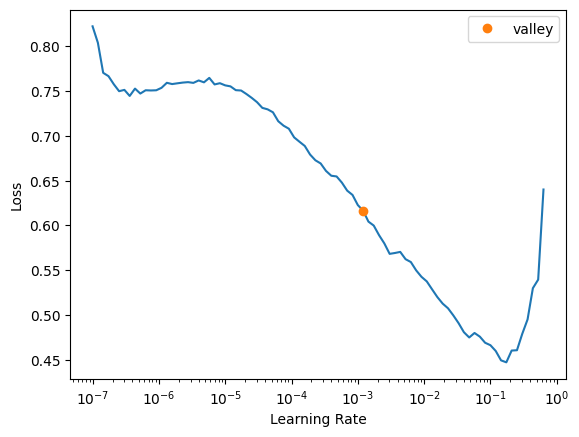

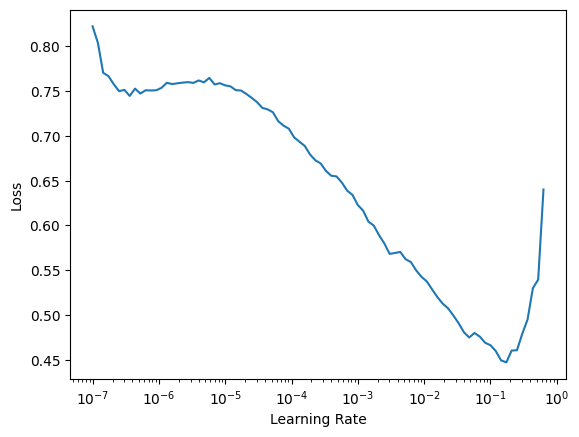

In [9]:
# Find the optimal learning rate
learn.lr_find()
learn.recorder.plot_lr_find()

In [10]:
optimal_lr = 1e-3

# Train the model
learn.fit_one_cycle(70, optimal_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.701014,0.684699,0.612903,00:00
1,0.692329,0.682297,0.645161,00:00
2,0.652816,0.686503,0.548387,00:00
3,0.636423,0.689717,0.612903,00:00
4,0.611246,0.663804,0.645161,00:00
5,0.581526,0.632939,0.709677,00:00
6,0.537025,0.603633,0.741935,00:00
7,0.505647,0.583777,0.806452,00:00
8,0.497457,0.666443,0.645161,00:00
9,0.462815,0.702600,0.580645,00:00


In [11]:
# Ensure the test dataset is preprocessed similarly
for col in test_male_df.columns:
    if test_male_df[col].isnull().sum() > 0:
        if test_male_df[col].dtype == 'object':
            test_male_df[col].fillna(test_male_df[col].mode()[0], inplace=True)
        else:
            test_male_df[col].fillna(test_male_df[col].median(), inplace=True)

In [12]:
from sklearn.metrics import accuracy_score

# Create test TabularDataLoaders
dls_test = dls_train.test_dl(test_male_df)

# Get predictions and targets
preds, targets = learn.get_preds(dl=dls_test)

# Convert predictions to class labels
pred_labels = preds.argmax(dim=1)

# Calculate accuracy
test_accuracy = accuracy_score(targets, pred_labels)
print(f'Test Set Accuracy: {test_accuracy:.4f}')

Test Set Accuracy: 0.8378


# Deep Learning Implementation for Female Dataset

The following code demonstrates the deep learning pipeline for the female subset of the dataset. This concise overview focuses on key steps including data preprocessing, model creation, training, and evaluation. For detailed explanations of each step, refer to the male dataset implementation.

## Steps Involved:

1. **Data Loading and Splitting**:
   The code loads the training and testing datasets and splits them into male and female subsets based on the 'Sex' column. This implementation focuses on the female subset (`train_female_df` and `test_female_df`).

2. **Preprocessing**:
   - **Identifying Columns**: Identifies categorical and continuous columns. Excludes 'ID_1', 'APOE4', 'Sex', and 'Diagnosis' from continuous columns.
   - **Handling Missing Values**: Fills missing values with the mode for categorical data and the median for continuous data.

3. **Creating Data Loaders**:
   - **Preprocessing Steps**: Includes categorifying categorical variables, filling missing values, and normalizing continuous variables.
   - **Splitting Data**: Splits the training data into training and validation sets using a random splitter.
   - **DataLoader Creation**: Uses the `TabularDataLoaders` class to create data loaders for efficient batch processing and shuffling.

4. **Model Creation**:
   A deep learning model is created using the `tabular_learner` function from the Fastai library, initializing a neural network with specified layers and metrics (accuracy in this case).

5. **Learning Rate Finder**:
   The optimal learning rate for training the model is found using the `lr_find` method.

6. **Model Training**:
   The model is trained using the `fit_one_cycle` method for a specified number of epochs.

7. **Model Evaluation**:
   After training, the model's performance is evaluated on the test dataset, which is preprocessed similarly to the training data.
   - **Predictions and Accuracy**: Predictions are made on the test set, and the accuracy is calculated by comparing the predicted labels with the actual labels.

8. **Model Export**:
   The trained model is exported for future use, enabling easy deployment and inference without needing to retrain.

In [69]:
# Identify categorical and continuous columns
exclude_columns = ['ID_1', 'APOE4', 'Sex', 'Diagnosis']
cont_names = [col for col in train_female_df.columns if col not in exclude_columns]
cat_names = ['ID_1', 'APOE4', 'Sex']

# Verify the identified columns
print("Categorical columns:", cat_names)
print("Continuous columns:", cont_names)

Categorical columns: ['ID_1', 'APOE4', 'Sex']
Continuous columns: ['MIMAT0000062', 'MIMAT0000063', 'MIMAT0000064', 'MIMAT0000065', 'MIMAT0000066', 'MIMAT0000067', 'MIMAT0000068', 'MIMAT0000069', 'MIMAT0000070', 'MIMAT0000071', 'MIMAT0000072', 'MIMAT0000073', 'MIMAT0000074', 'MIMAT0000075', 'MIMAT0000076', 'MIMAT0000077', 'MIMAT0000078', 'MIMAT0000079', 'MIMAT0000080', 'MIMAT0000081', 'MIMAT0000082', 'MIMAT0000083', 'MIMAT0000084', 'MIMAT0000085', 'MIMAT0000086', 'MIMAT0000087', 'MIMAT0000088', 'MIMAT0000089', 'MIMAT0000090', 'MIMAT0000091', 'MIMAT0000092', 'MIMAT0000093', 'MIMAT0000094', 'MIMAT0000095', 'MIMAT0000096', 'MIMAT0000097', 'MIMAT0000098', 'MIMAT0000099', 'MIMAT0000100', 'MIMAT0000101', 'MIMAT0000102', 'MIMAT0000103', 'MIMAT0000104', 'MIMAT0000222', 'MIMAT0000226', 'MIMAT0000227', 'MIMAT0000228', 'MIMAT0000231', 'MIMAT0000232, MIMAT0004563', 'MIMAT0000241', 'MIMAT0000242', 'MIMAT0000243', 'MIMAT0000244', 'MIMAT0000245', 'MIMAT0000250', 'MIMAT0000251', 'MIMAT0000252', 'MIMAT0

In [70]:
# Check for missing values
print(train_female_df.isnull().sum())

# Handle missing values by filling them
# This step may already be handled by `FillMissing` in fastai's processing
for col in train_female_df.columns:
    if train_female_df[col].isnull().sum() > 0:
        if train_female_df[col].dtype == 'object':  # For categorical columns
            train_female_df[col].fillna(train_female_df[col].mode()[0], inplace=True)
        else:  # For numerical columns
            train_female_df[col].fillna(train_female_df[col].median(), inplace=True)

ID_1            0
MIMAT0000062    0
MIMAT0000063    0
MIMAT0000064    0
MIMAT0000065    0
               ..
MIMAT0035704    0
Diagnosis       0
Age             0
Sex             0
APOE4           0
Length: 2567, dtype: int64


In [71]:
from fastai.tabular.all import *

# Define preprocessing steps
procs = [Categorify, FillMissing, Normalize]

splits = RandomSplitter(valid_pct=0.2)(range_of(train_female_df))

# Create TabularDataLoaders
dls_train = TabularDataLoaders.from_df(train_female_df,
                                       procs=procs,
                                       cat_names=cat_names,
                                       cont_names=cont_names,
                                       y_names='Diagnosis',
                                       y_block=CategoryBlock(),
                                       bs=32,
                                       splits = splits,
                                       index_col = 'ID_1')

# Verify the DataLoader
dls_train.show_batch()

In [72]:
layers = [200, 200, 200]
learn = tabular_learner(dls_train, layers=layers, metrics=accuracy)

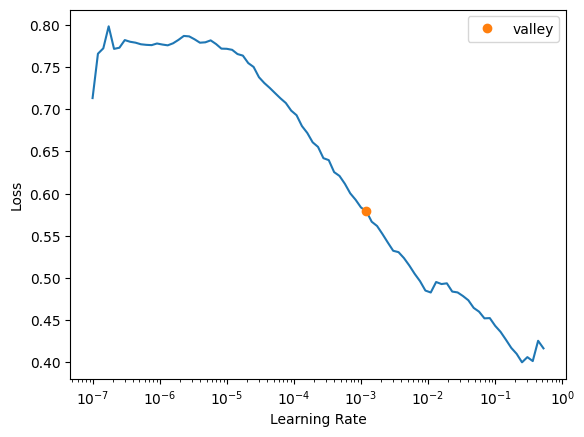

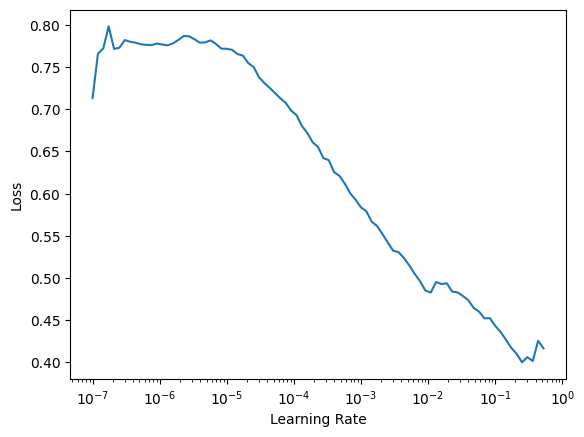

In [73]:
# Find the optimal learning rate
learn.lr_find()
learn.recorder.plot_lr_find()

In [74]:
optimal_lr = 1e-3

# Train the model
learn.fit_one_cycle(70, optimal_lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.728654,0.702238,0.321429,00:00
1,0.692296,0.706681,0.357143,00:00
2,0.623853,0.707397,0.357143,00:00
3,0.594988,0.707691,0.357143,00:00
4,0.572909,0.691121,0.464286,00:00
5,0.557955,0.673795,0.535714,00:00
6,0.521413,0.639599,0.607143,00:00
7,0.491479,0.608975,0.571429,00:00
8,0.474075,0.601865,0.571429,00:00
9,0.455021,0.642060,0.571429,00:00


In [75]:
# Ensure the test dataset is preprocessed similarly
for col in test_female_df.columns:
    if test_female_df[col].isnull().sum() > 0:
        if test_female_df[col].dtype == 'object':
            test_female_df[col].fillna(test_female_df[col].mode()[0], inplace=True)
        else:
            test_female_df[col].fillna(test_female_df[col].median(), inplace=True)

In [76]:
from sklearn.metrics import accuracy_score

# Create test TabularDataLoaders
dls_test = dls_train.test_dl(test_female_df)

# Get predictions and targets
preds, targets = learn.get_preds(dl=dls_test)

# Convert predictions to class labels
pred_labels = preds.argmax(dim=1)

# Calculate accuracy
test_accuracy = accuracy_score(targets, pred_labels)
print(f'Test Set Accuracy: {test_accuracy:.4f}')

Test Set Accuracy: 0.6579
